# Statistical Inference and Probability

## Problem 1 (Standard Deviation, Variance, and Dot Plot)

1.9 ) (Chapter 1, pg. 17) Exercise 1.3 on page 13 showed tensile strength data for two samples, one in which specimens were exposed to an aging process and one in which there was no aging of the specimens. 
> - (a) Calculate the sample variance as well as standard deviation in tensile strength for both samples.
> - (b) Does there appear to be any evidence that aging affects the variability in tensile strength? (See also the plot for Exercise 1.3 on page 13.)


In [67]:
# Imported library for data analysis and plotting
library("tidyverse")
library("ggformula")
library("ggplot2")

In [33]:
# 20 specimens total
# 10 exposed to as signed randomly to be exposed to an accelerated batch
# aging process that involved exposure to high temperatures for 10 days

# Measurements of tensile strength (psi)
# Define the No aging array
no_aging_tensile <- c(227, 222, 218, 217, 225, 218, 216, 229, 228, 221)

# Define the Aging array
aging_tensile <- c(219, 214, 215, 211, 209, 218, 203, 204, 201, 205)

In [34]:
# Print the arrays to verify
print(no_aging_tensile)
print(aging_tensile)

 [1] 227 222 218 217 225 218 216 229 228 221
 [1] 219 214 215 211 209 218 203 204 201 205


In [35]:
# Calculate the sample variance and standard deviation for no_aging_tensile
var_no_aging <- var(no_aging_tensile)
sd_no_aging <- sd(no_aging_tensile)

# Calculate the sample variance and standard deviation for aging_tensile
var_aging <- var(aging_tensile)
sd_aging <- sd(aging_tensile)

# Print the results
cat("No Aging - Variance:", var_no_aging, "Standard Deviation:", sd_no_aging, "\n")
cat("Aging - Variance:", var_aging, "Standard Deviation:", sd_aging, "\n")

No Aging - Variance: 23.65556 Standard Deviation: 4.863698 
Aging - Variance: 42.1 Standard Deviation: 6.488451 


In [36]:
# Create a data frame for the data
tensile_data <- data.frame(
  TensileStrength = c(no_aging_tensile, aging_tensile),
  Condition = rep(c("no_aging_tensile", "aging_tensile"), each = 10)
)

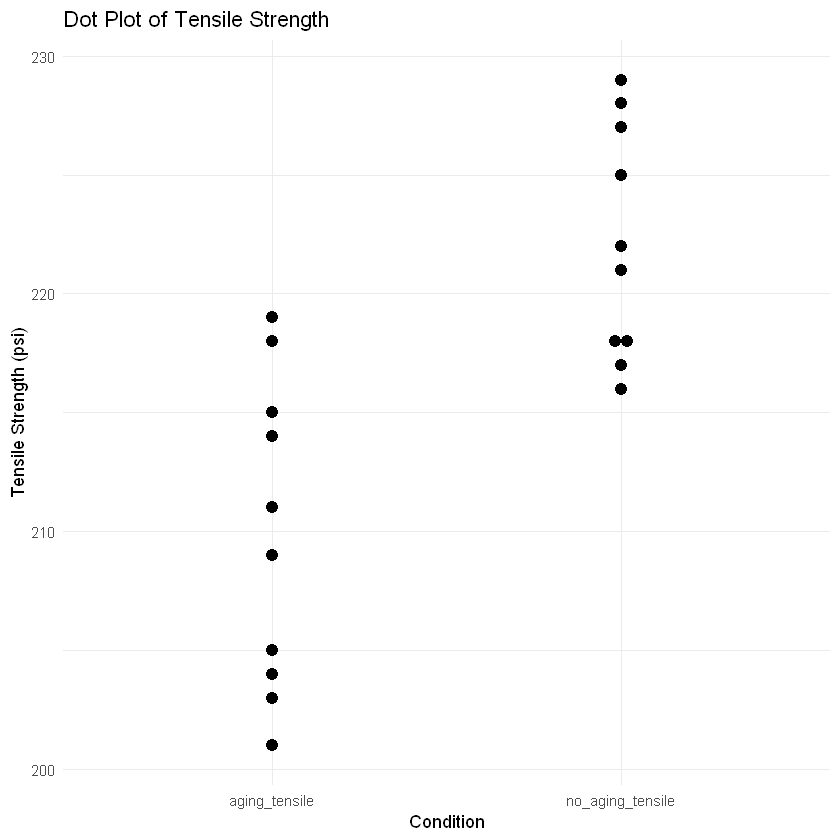

In [37]:
# Create a dot plot using ggplot2
ggplot(tensile_data, aes(x = Condition, y = TensileStrength)) +
  geom_dotplot(binaxis = 'y', stackdir = 'center', binwidth = .5, dotsize = 1) +
  labs(
    title = "Dot Plot of Tensile Strength",
    x = "Condition",
    y = "Tensile Strength (psi)"
  ) +
  theme_minimal()

## Problem 2 (Relative Frequency Histogram, Mean, Median, 10% Trimmed Mean)

1.25 ) The following data is related to that in Exercise 1.24. It gives the percentages of the families that are in the upper income level, for the same individual schools in the same order as in Exercise 1.24. 
> Data: 72.2 31.9 26.5 29.1 27.3 8.6 22.3 26.5 20.4 12.8 25.1 19.2 24.1 58.2 68.1 89.2 55.1 9.4 14.5 13.9 20.7 17.9 8.5 55.4 38.1 54.2 21.5 26.2 59.1 43.3
> - (a)Calculate the sample mean.
> - (b)Calculate the sample median.
> - (c)Construct a relative frequency histogram of the data.
> - (d)Compute the 10% trimmed mean. Compare with the results in (a)and(b) and comment.


In [28]:
perc_upper_income <- c(72.2, 31.9, 26.5, 29.1, 27.3, 8.6, 22.3, 26.5, 20.4, 
                12.8, 25.1, 19.2, 24.1, 58.2, 68.1, 89.2, 55.1, 9.4, 
                14.5, 13.9, 20.7, 17.9, 8.5, 55.4, 38.1, 54.2, 21.5, 
                26.2, 59.1, 43.3)
sorted_income <- sort(perc_upper_income)
trimmed_income <- sorted_income[4:27]

cat("Sum of values: ", sum(perc_upper_income), "\n")
cat("Sorted List: ", sort(sorted_income), "\n")
cat("Trimmed Set: ", sum(trimmed_income))

Sum of values:  999.3 
Sorted List:  8.5 8.6 9.4 12.8 13.9 14.5 17.9 19.2 20.4 20.7 21.5 22.3 24.1 25.1 26.2 26.5 26.5 27.3 29.1 31.9 38.1 43.3 54.2 55.1 55.4 58.2 59.1 68.1 72.2 89.2 
Trimmed Set:  743.3

In [66]:
# calculate sample mean
sample_mean_income <- mean(perc_upper_income)
# calculate sample median
sample_median_income <- median(perc_upper_income)
# Calculate the 10% trimmed mean
trimmed_mean_income <- mean(perc_upper_income, trim = 0.10)

# Print the sample median, sample mean, & 10% trimmed mean
cat("Sample Median:", sample_median_income, "\n")
cat("Sample Mean:", sample_mean_income, "\n")
cat("10% Trimmed Mean:", trimmed_mean_income, "\n")

Sample Median: 26.35 
Sample Mean: 33.31 
10% Trimmed Mean: 30.97083 


In [54]:
income_data <- data.frame(perc_upper_income)
head(income_data)

,perc_upper_income
,<dbl>
1,72.2
2,31.9
3,26.5
4,29.1
5,27.3
6,8.6


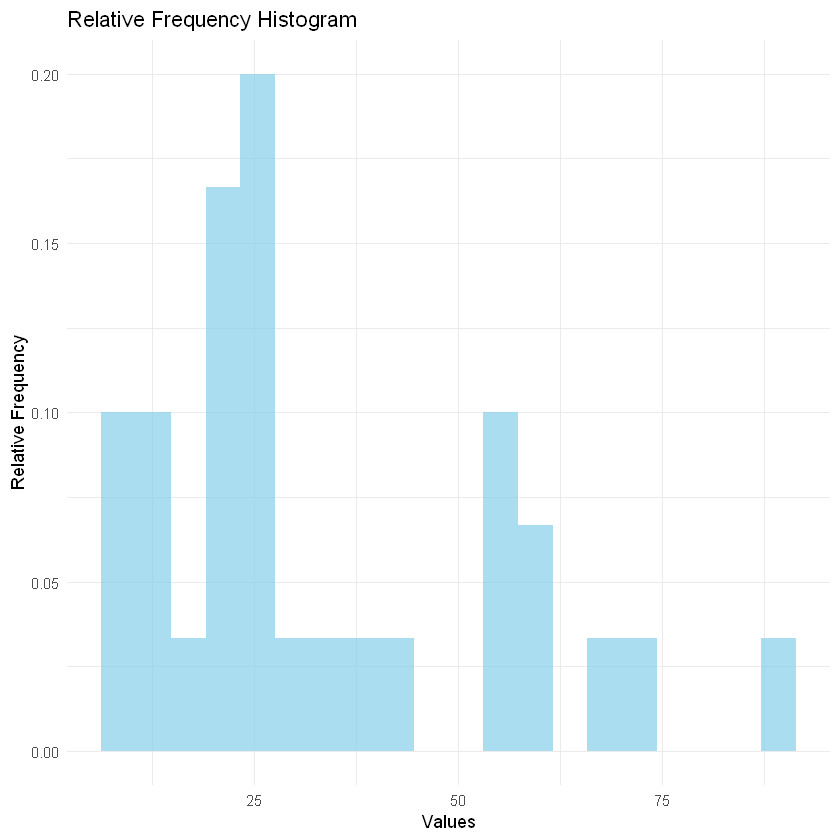

In [87]:
# Create a relative frequency histogram using ggplot2
# relative_frequency = count / sum(count)) 
ggplot(income_data, aes(x = perc_upper_income)) +
  geom_histogram(aes(y = after_stat(count / sum(count))), bins = 20, fill = "skyblue", alpha = .7) +
  labs(
    title = "Relative Frequency Histogram",
    x = "Values",
    y = "Relative Frequency"
  ) +
  theme_minimal()

## Problem 3 (Probability of Dice)

2.50 ) Assuming that all elements of S in Exercise 2.8 on page 42 are equally likely to occur, find
> - (a) the probability of event A;
> - (b) the probability of event C;
> - (c) the probability of event A ∩ C.


Important Facts:
- green die = x
- red die = y
- 6 sides a die
- Thus, S contains all possible pair of (x,y), so 6×6=36
- ("rule method") S = {(x,y) | x ∈ {1,2,3,4,5,6} and y ∈ {1,2,3,4,5,6}}
- S={(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),
(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),
(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),
(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),
(5,1),(5,2),(5,3),(5,4),(5,5),(5,6),
(6,1),(6,2),(6,3),(6,4),(6,5),(6,6)}

Events
- Event A: The sum of the dice is greater than 8. (x + y > 8)
- Event C: A number greater than 4 comes up on the green die. (x > 4)
- Event A∩C: The sum of the dice is greater than 8 and the green die shows a number greater than 4. 

In [11]:
# Total number of possible outcomes
total_outcomes <- 36

# Define the event A
event_a <- data.frame(
  green_die = c(3, 4, 4, 5, 5, 5, 6, 6, 6, 6),
  red_die = c(6, 5, 6, 4, 5, 6, 3, 4, 5, 6)
)
# Define the event B
event_c <- data.frame(
  green_die = c(rep(5, 6), rep(6, 6)),
  red_die = c(1:6, 1:6)
) 

# Define the event A ∩ C
event_a_and_c <- data.frame(
  green_die = c(5, 5, 5, 6, 6, 6, 6),
  red_die = c(4, 5, 6, 3, 4, 5, 6)
)

In [14]:
# Probability of event A
probability_a <- nrow(event_a) / total_outcomes
cat("Probabilities:\nEvent A ->", probability_a, "\n")

# Probability of event C
probability_c <- nrow(event_c) / total_outcomes
cat("Event C -> ", probability_c, "\n")

# Probability of event A ∩ C
probability_a_and_c <- nrow(event_a_and_c) / total_outcomes
cat("Event A & C -> ", probability_a_and_c, "\n")

Probabilities:
Event A -> 0.2777778 
Event C ->  0.3333333 
Event A & C ->  0.1944444 


## Problem 4 (Logical Errors in Probability)

2.49 ) Find the errors in each of the following statements: 
> - (a) The probabilities that an automobile salesperson will sell 0, 1, 2, or 3 cars on any given day in February are, respectively, 0.19, 0.38, 0.29, and 0.15.
> - (b) The probability that it will rain tomorrow is 0.40, and the probability that it will not rain tomorrow is 0.52.
> - (c) The probabilities that a printer will make 0, 1, 2, 3, or 4 or more mistakes in setting a document are, respectively, 0.19,0.34,−0.25,0.43, and 0.29.
> - (d) On a single draw from a deck of playing cards, the probability of selecting a heart is 1/4, the probability of selecting a black card is 1/2, and the probability of selecting both a heart and a black card is 1/8.


### Problem A
- P(0) = 0.19
- P(1) = 0.38
- P(2) = 0.29
- P(3) = 0.15

To be a valid probability distribution, the sum of all probabilities must equal 1.

Error: The sum of the probabilities is 1.01, which is greater than 1.

In [16]:
total = 0.19 + 0.38 + .29 + .15

print(total)

[1] 1.01


### Problem B
For complementary events (rain and no rain), the sum of the probabilities must be 1.

0.40 + 0.52 = 0.92

Error: The sum of the probabilities is 0.92, which is less than 1.

### Problem 3
- P(0) = 0.19
- P(1) = 0.34
- P(2) = -0.25
- P(3) = 0.43
- P(4) = 0.29

Error: Probabilities must be non-negative. Here,

P(2)=−0.25 is negative, which is not possible.

### Problem 4
- P(heart) = 1/4
- P(black_card) = 1/2
- P(heart & black_card) = 1/8

Error: Hearts and black cards are mutually exclusive events. A card cannot be both a heart and a black card at the same time, so P(heart and black card) must be 0.